# Brain Tumor Classification Model using Deep Learning

### Data collection 

Link to the dataset that we used- https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

# Importing the libraries required

In [1]:
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

Loading the dataset using ImageDataGenerator so that the data is loaded in batches

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('../input/brain-tumor-mri-dataset/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../input/brain-tumor-mri-dataset/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Model Generation

In [5]:
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf

In [6]:
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())

# Full connect layers

model3.add(Dense(units= 512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.0001, clipvalue=0.5)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

# Architecture of the model

In [7]:
from tensorflow import keras

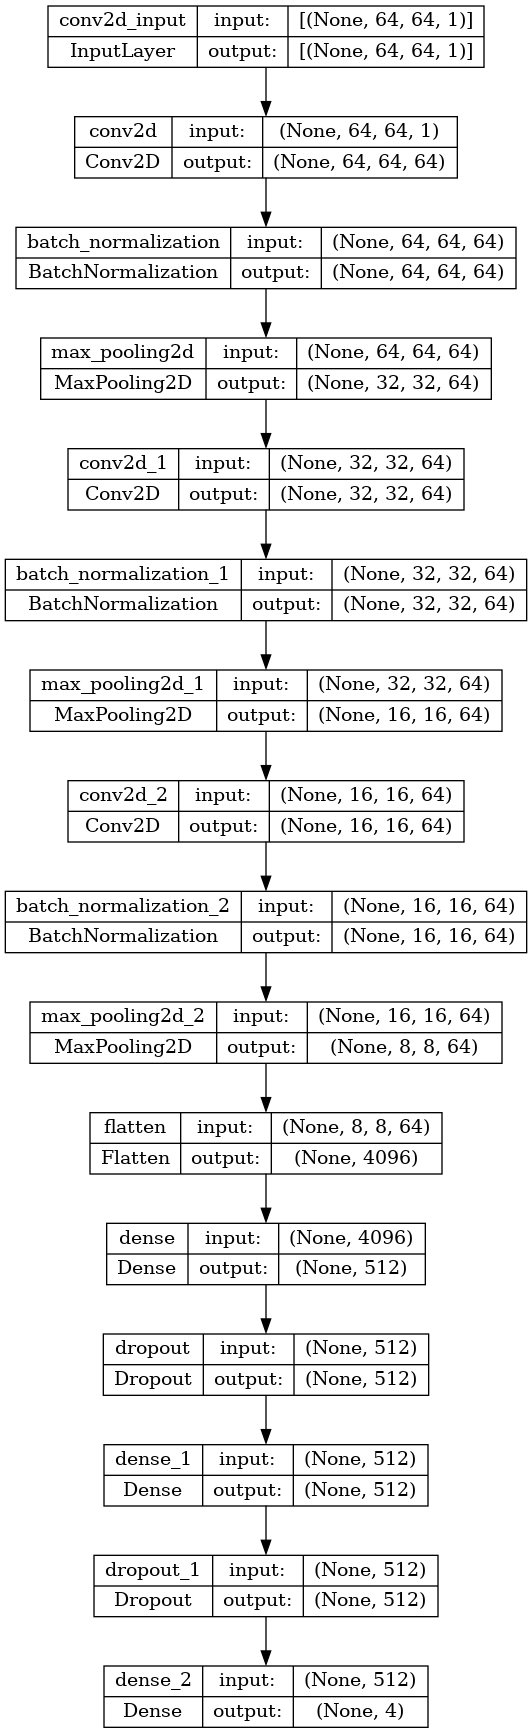

In [8]:
keras.utils.plot_model(model3, show_shapes=True)

# Creating callbacks for the model.
If the model dosen't continue to improve (loss), the trainning will stop.

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


Stop training if loss doesn't keep decreasing.


In [ ]:
model3_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model3_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

Automatically saves the best weights of the model, based on best val_accuracy

In [ ]:
model3_mcp = ModelCheckpoint(filepath = 'model3_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

In [10]:
# Fitting the model
history3 = model3.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model3_es, model3_rlr, model3_mcp])

Epoch 1/100
178/178 [==============================] - ETA: 0s - loss: 0.9000 - categorical_accuracy: 0.7023
Epoch 1: val_categorical_accuracy improved from -inf to 0.24297, saving model to model3_weights.h5
178/178 [==============================] - 88s 405ms/step - loss: 0.9000 - categorical_accuracy: 0.7023 - val_loss: 3.2778 - val_categorical_accuracy: 0.2430 - lr: 0.0010
Epoch 2/100
178/178 [==============================] - ETA: 0s - loss: 0.5225 - categorical_accuracy: 0.8037
Epoch 2: val_categorical_accuracy improved from 0.24297 to 0.42188, saving model to model3_weights.h5
178/178 [==============================] - 27s 152ms/step - loss: 0.5225 - categorical_accuracy: 0.8037 - val_loss: 1.8305 - val_categorical_accuracy: 0.4219 - lr: 0.0010
Epoch 3/100
178/178 [==============================] - ETA: 0s - loss: 0.4153 - categorical_accuracy: 0.8398
Epoch 3: val_categorical_accuracy improved from 0.42188 to 0.67578, saving model to model3_weights.h5
178/178 [===================

## Visalizing the loss and accuracy of the model over the epochs for which it ran

In [11]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Loss on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

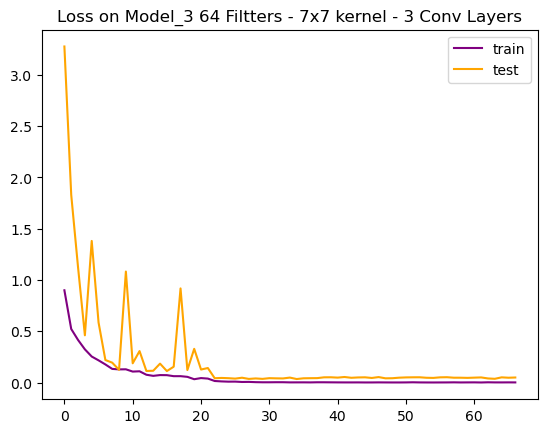

In [12]:
fig, ax = plt.subplots()

ax.plot(history3.history["loss"],c = "purple")
ax.plot(history3.history["val_loss"],c = "orange")
ax.legend(["train", "test"])
ax.set_title('Loss on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')



Text(0.5, 1.0, 'Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

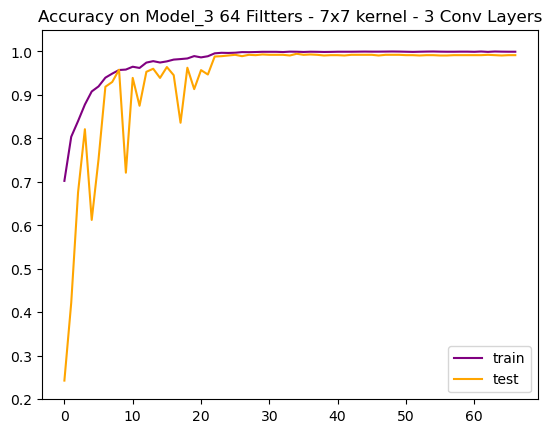

In [13]:

fig, ax = plt.subplots()
ax.plot(history3.history["categorical_accuracy"],c = "purple")
ax.plot(history3.history["val_categorical_accuracy"],c = "orange")
ax.set_ylim([0.2,1.05])
ax.legend(["train", "test"])
ax.set_title('Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

In [14]:
print("Average training accuracy from 1st to 69th epoch",sum(history3.history["categorical_accuracy"]) / len(history3.history["categorical_accuracy"])*100)


Average training accuracy from 1st to 69th epoch 97.84010657623632


In [15]:
loss,accu=model3.evaluate(test)


41/41 [==============================] - 4s 107ms/step - loss: 0.0466 - categorical_accuracy: 0.9916


# Loss value= 0.0338
# Model accuracy=99.08%